/tmp/ipython-input-1972528853.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 2].legend()
/tmp/ipython-input-1972528853.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', ax=axes[1, 0], palette=['#4dabf7', '#e599f7'], alpha=0.8)
/tmp/ipython-input-1972528853.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 1].legend()


<Figure size 800x600 with 0 Axes>

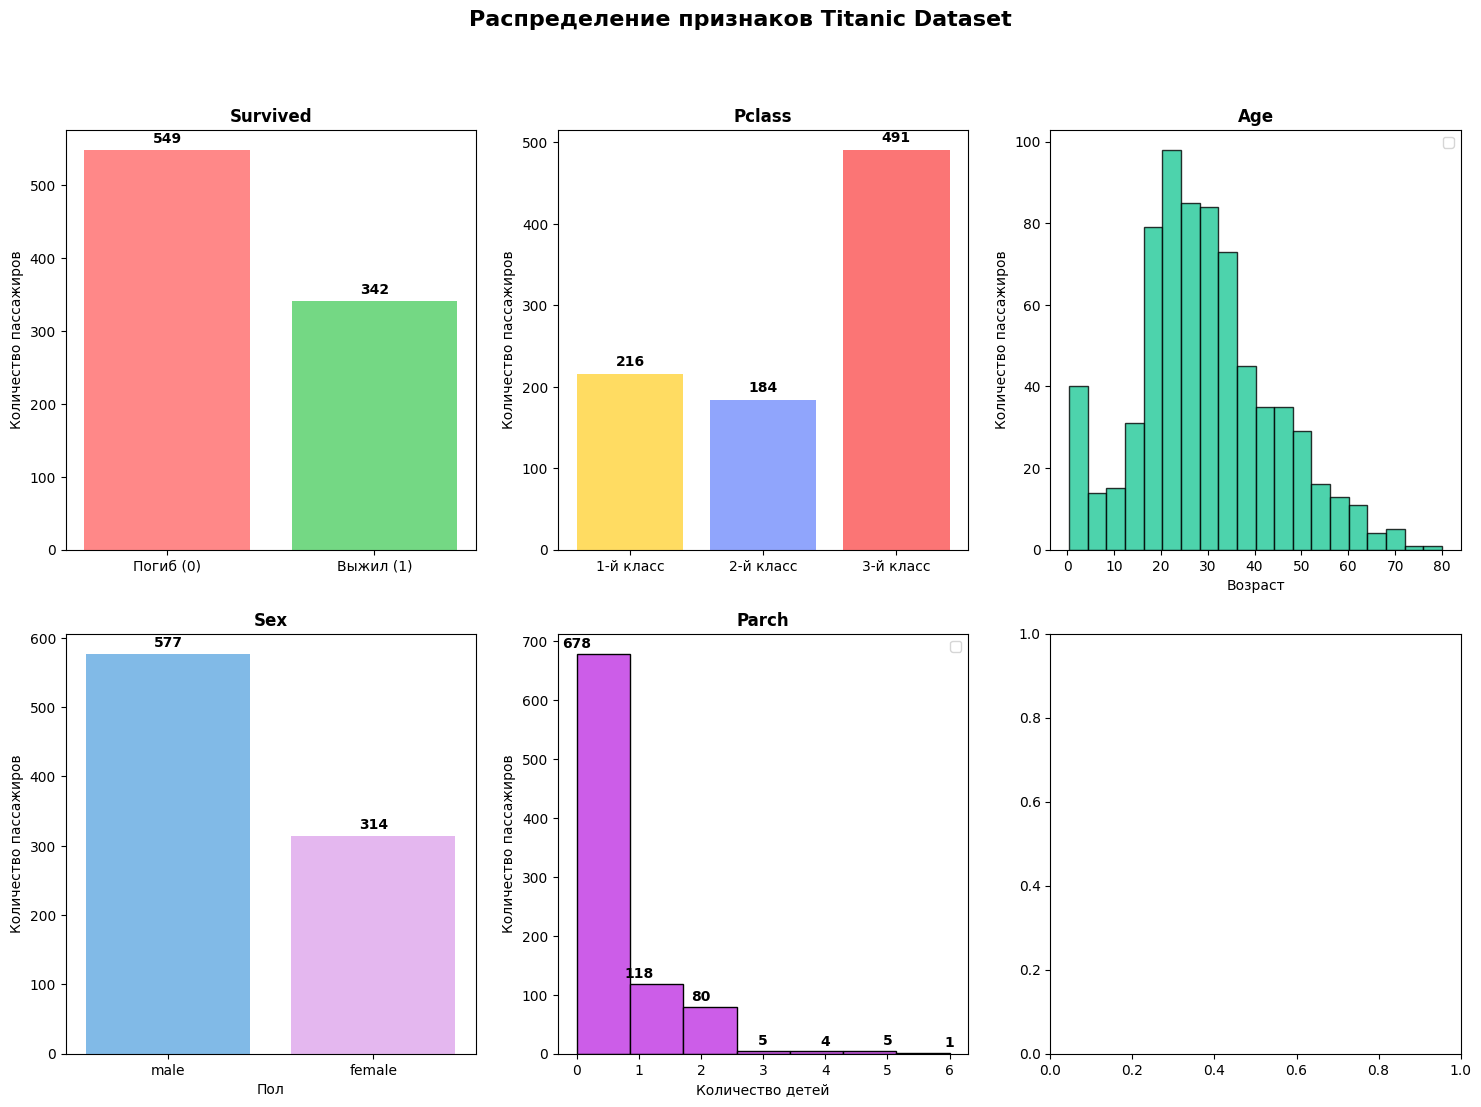

In [1]:
#Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл
#Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - 2 балла
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
plt.figure(figsize=(8, 6))

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Распределение признаков Titanic Dataset', fontsize=16, fontweight='bold')

# 1. Survived
survived_counts = df['Survived'].value_counts().sort_index()
bars1 = axes[0, 0].bar(['Погиб (0)', 'Выжил (1)'], survived_counts.values,
                      color=['#ff6b6b', '#51cf66'], alpha=0.8)
axes[0, 0].set_title('Survived', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Количество пассажиров')
for i, v in enumerate(survived_counts.values):
    axes[0, 0].text(i, v + 10, f'{v}', ha='center', fontweight='bold')

# 2. Pclass
pclass_counts = df['Pclass'].value_counts().sort_index()
colors = ['#ffd43b', '#748ffc', '#fa5252']
bars2 = axes[0, 1].bar(['1-й класс', '2-й класс', '3-й класс'], pclass_counts.values,
                      color=colors, alpha=0.8)
axes[0, 1].set_title('Pclass', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Количество пассажиров')
for i, v in enumerate(pclass_counts.values):
    axes[0, 1].text(i, v + 10, f'{v}', ha='center', fontweight='bold')

# 3. Age
age_data = df['Age'].dropna()
axes[0, 2].hist(age_data, bins=20, color='#20c997', alpha=0.8, edgecolor='black')
axes[0, 2].set_title('Age', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Возраст')
axes[0, 2].set_ylabel('Количество пассажиров')
axes[0, 2].legend()

# 4. Sex
sns.countplot(data=df, x='Sex', ax=axes[1, 0], palette=['#4dabf7', '#e599f7'], alpha=0.8)
axes[1, 0].set_title('Sex', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Пол')
axes[1, 0].set_ylabel('Количество пассажиров')
for i, count in enumerate(df['Sex'].value_counts()):
    axes[1, 0].text(i, count + 10, f'{count}', ha='center', fontweight='bold')

# 5. Parch
parch_data = df['Parch']
axes[1, 1].hist(parch_data, bins=7, color='#cc5de8', edgecolor='black')
axes[1, 1].set_title('Parch', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Количество детей')
axes[1, 1].set_ylabel('Количество пассажиров')
axes[1, 1].legend()
parch_counts = df['Parch'].value_counts().sort_index()
for i, count in parch_counts.items():
    axes[1, 1].text(i, count + 5, f'{count}', ha='center', va='bottom', fontweight='bold')




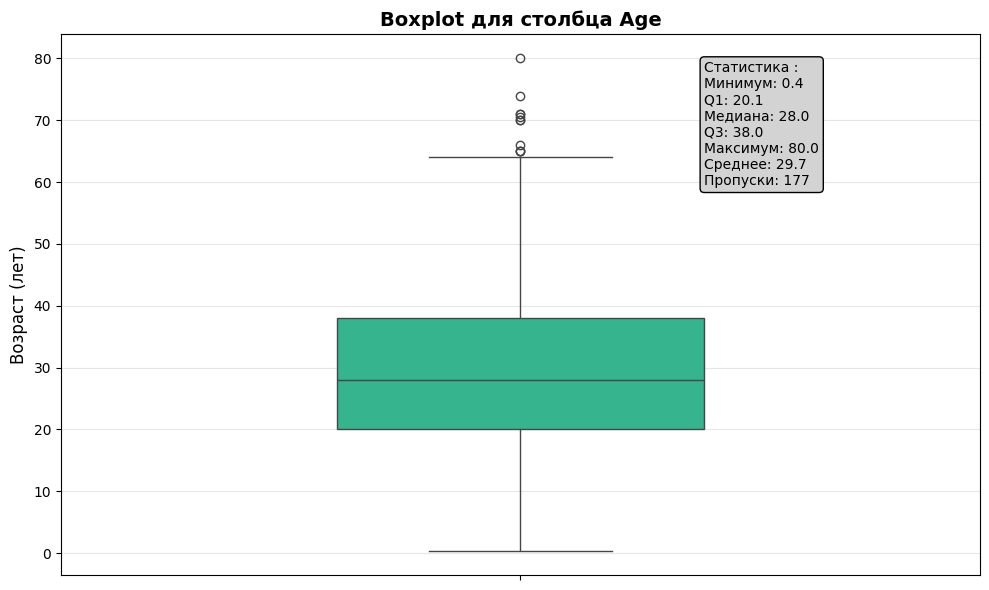

In [2]:
#Постройте график типа boxplot для столбца Age
#Проинтепретируйте полученный график
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Age', color='#20c997', width=0.4)
plt.title('Boxplot для столбца Age', fontsize=14, fontweight='bold')
plt.ylabel('Возраст (лет)', fontsize=12)
age_data = df['Age'].dropna()


# Добавляем аннотации с основными статистиками
age_data = df['Age'].dropna()
stats = {
    'Минимум': age_data.min(),
    'Q1': age_data.quantile(0.25),
    'Медиана': age_data.median(),
    'Q3': age_data.quantile(0.75),
    'Максимум': age_data.max(),
    'Среднее': age_data.mean()
}
stats_text = f"Статистика :\n"
stats_text += f"Минимум: {stats['Минимум']:.1f}\n"
stats_text += f"Q1: {stats['Q1']:.1f}\n"
stats_text += f"Медиана: {stats['Медиана']:.1f}\n"
stats_text += f"Q3: {stats['Q3']:.1f}\n"
stats_text += f"Максимум: {stats['Максимум']:.1f}\n"
stats_text += f"Среднее: {stats['Среднее']:.1f}\n"
stats_text += f"Пропуски: {df['Age'].isnull().sum()}"

plt.text(0.7, 0.95, stats_text, transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"),
         fontsize=10, verticalalignment='top')



plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

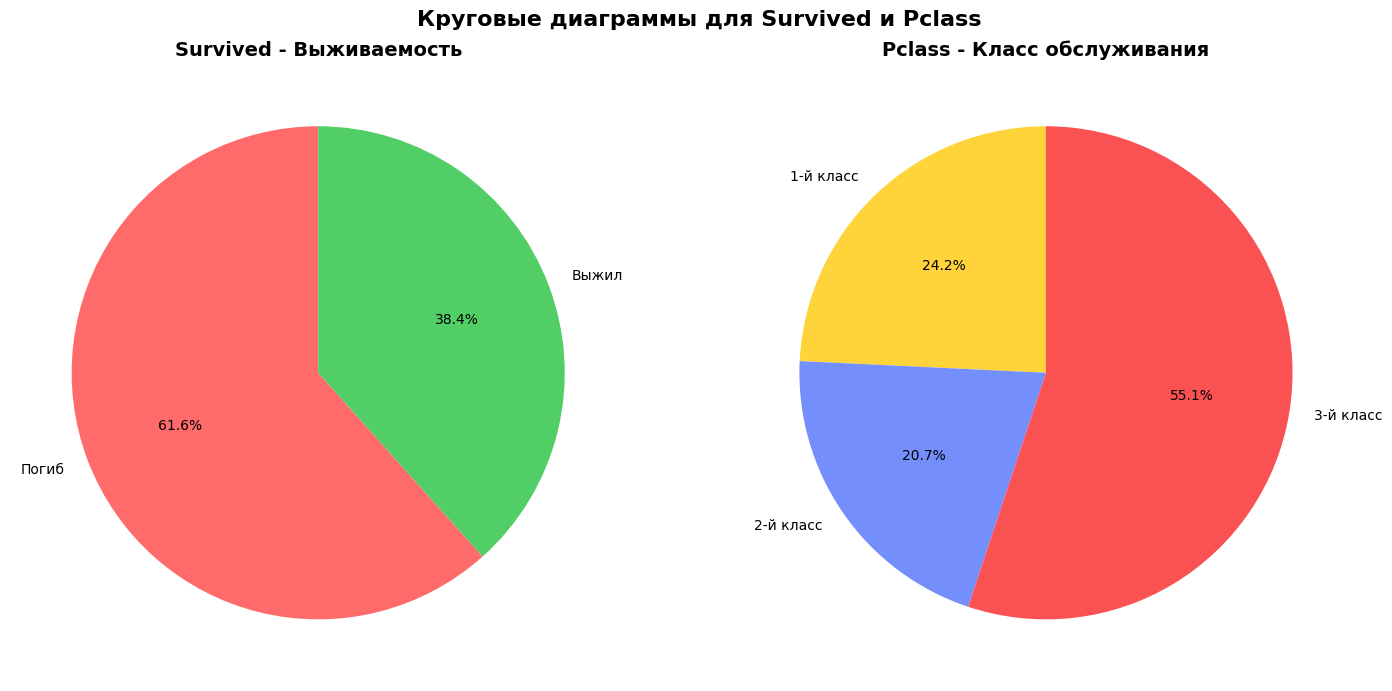

In [3]:
#Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Круговые диаграммы для Survived и Pclass', fontsize=16, fontweight='bold')

survived_counts = df['Survived'].value_counts().sort_index()
survived_labels = ['Погиб', 'Выжил']
survived_colors = ['#ff6b6b', '#51cf66']
wedges1, texts1, autotexts1 = ax1.pie(survived_counts.values,
                                      labels=survived_labels,
                                      autopct='%1.1f%%', #в проценты
                                      colors=survived_colors,
                                      startangle=90)
ax1.set_title('Survived - Выживаемость', fontsize=14, fontweight='bold')


pclass_counts = df['Pclass'].value_counts().sort_index()
pclass_labels = ['1-й класс', '2-й класс', '3-й класс']
pclass_colors = ['#ffd43b', '#748ffc', '#fa5252']
wedges2, texts2, autotexts2 = ax2.pie(pclass_counts.values,
                                      labels=pclass_labels,
                                      autopct='%1.1f%%', #в проценты
                                      colors=pclass_colors,
                                      startangle=90)
ax2.set_title('Pclass - Класс обслуживания', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

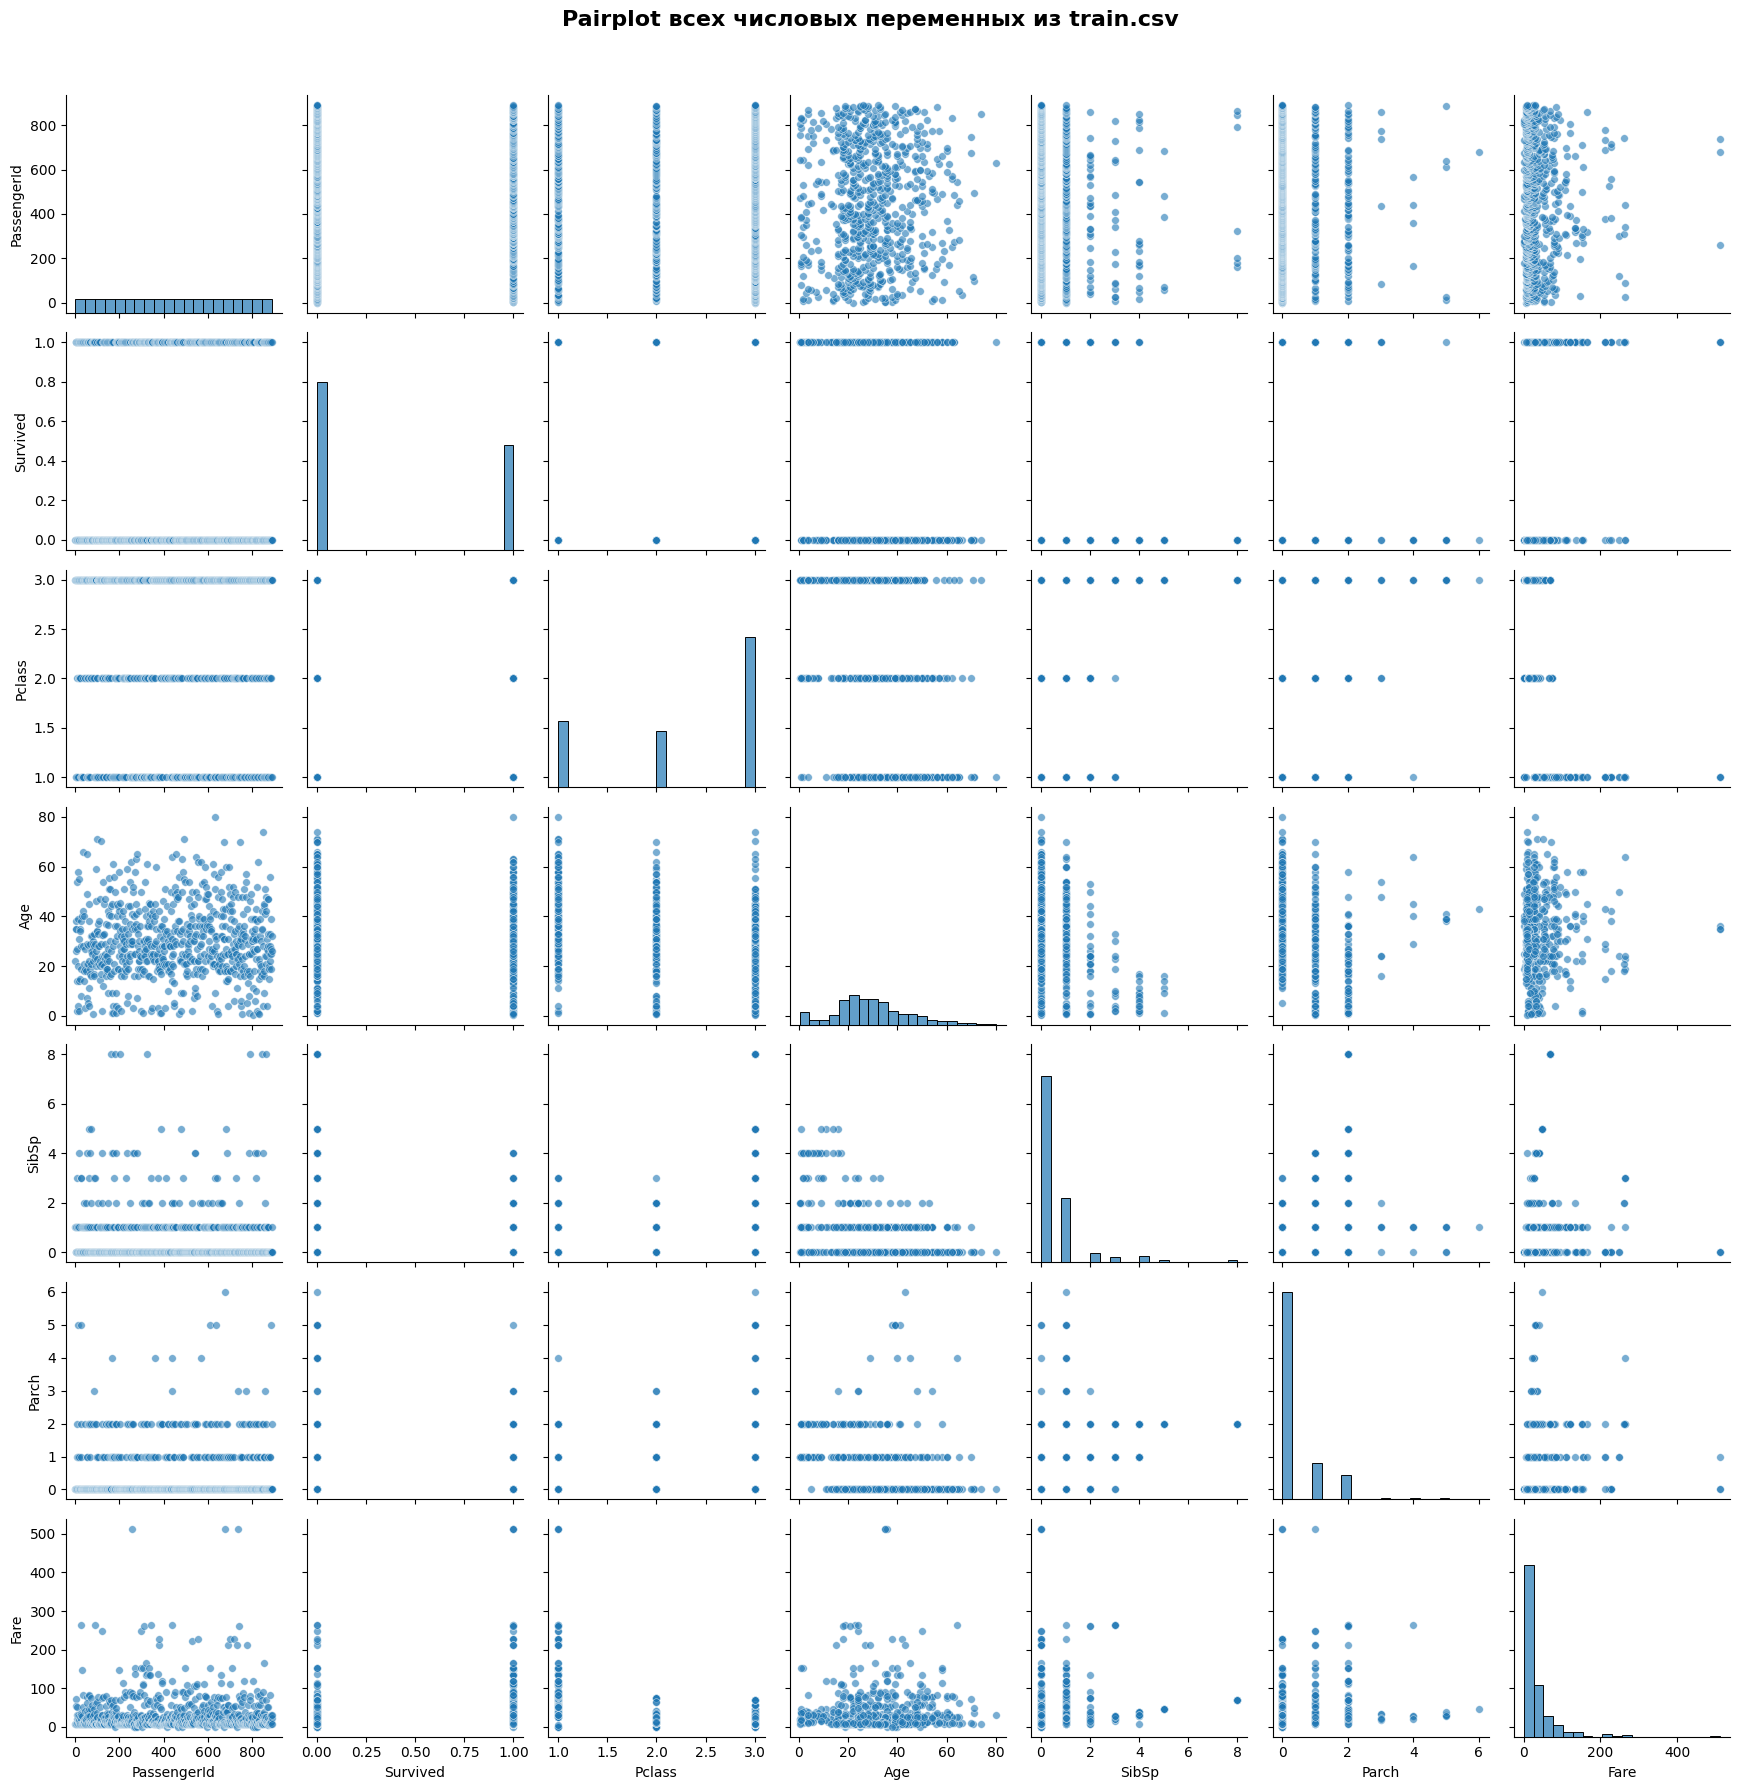

In [4]:
#Постройте график типа pairplot для всех числовых переменных датасета

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df[numeric_columns],
                        diag_kind='hist',
                        plot_kws={'alpha': 0.6, 's': 30},
                        diag_kws={'alpha': 0.7, 'bins': 20})

pairplot.fig.suptitle('Pairplot всех числовых переменных из train.csv',
                      y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [5]:
import plotly.express as px


df['Class_Label'] = df['Pclass'].map({1: '1-й класс', 2: '2-й класс', 3: '3-й класс'})
df['Sex_Label'] = df['Sex'].map({'male': 'мужчины', 'female': 'женщины'})
fig = px.sunburst(df, path=['Class_Label', 'Sex_Label'], title='Пассажиры Титаника: Класс и Пол')
fig.show()